<a href="https://colab.research.google.com/github/zrbeaty/zorabio108tutorial/blob/main/Zora_Beaty_Harbour_Porpoise_Activity_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Harbour Porpoise Distribution and Foraging Activity

We will be using a dataset which contains data on **harbour porpoise acoustic activity** from passive acoustic data loggers around the Kullen Peninsula in Sweden from April 2014 to March 2015.

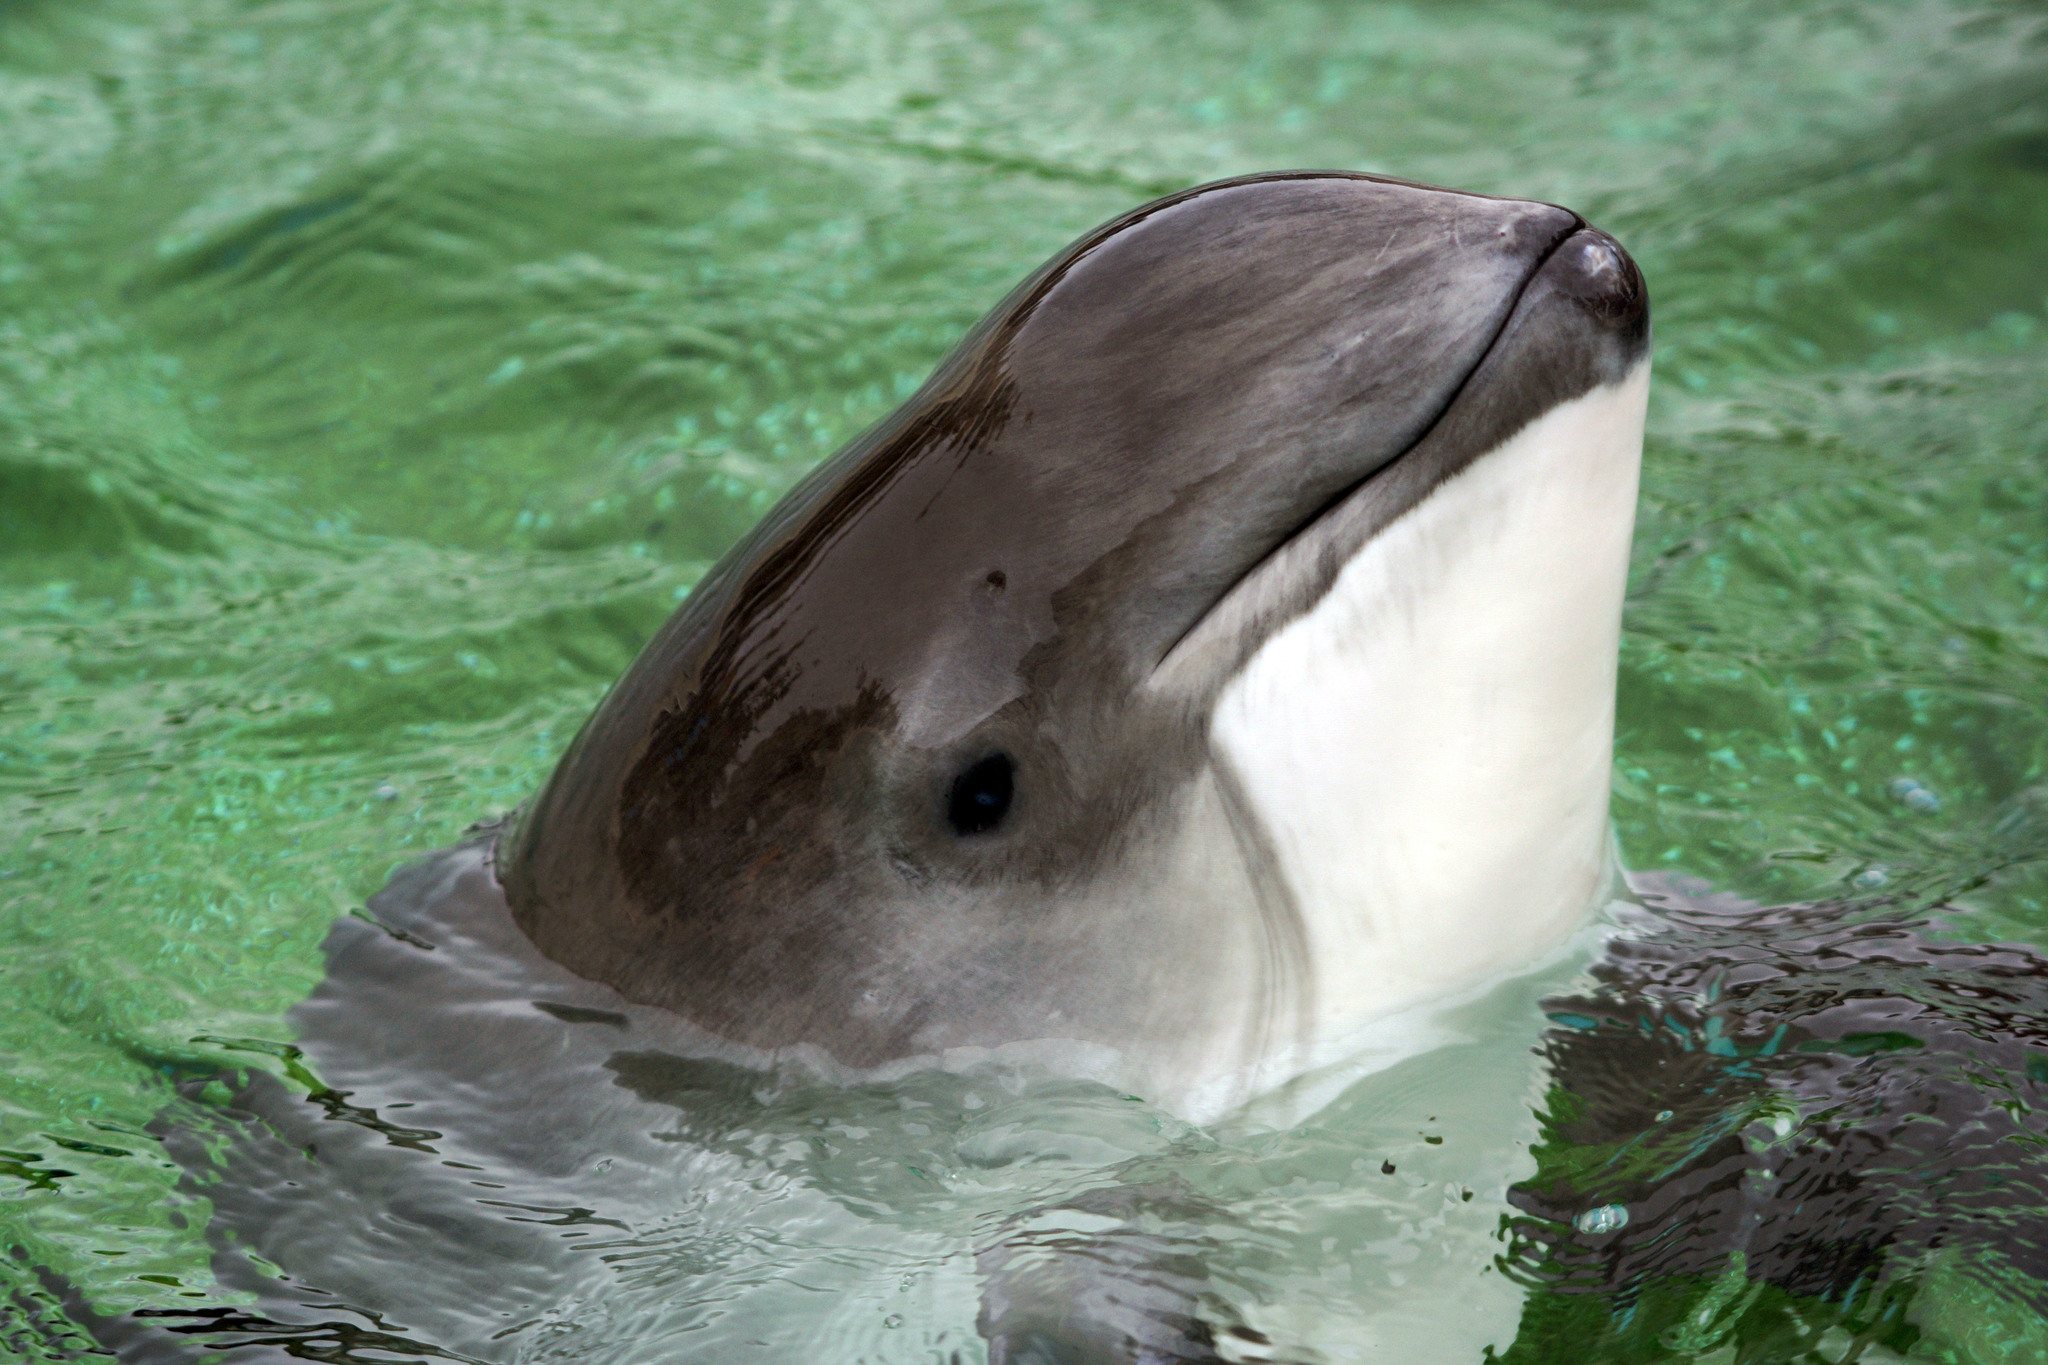

Stedt, Johanna; Wahlberg, Magnus; Carlström, Julia et al. (2023). Micro-scale spatial preference and temporal cyclicity linked to foraging in harbour porpoises [Dataset]. Dryad. https://doi.org/10.5061/dryad.c59zw3rc0

The **major questions** of this paper are what is the connection between harbour porpoises and foraging, and what are the patterns of harbour porpoise presence and foraging?

The **hypothesis** of this study is prey availability drives porpoise presence within the Kullen Peninsula.

The **findings** of this paper are large acoustic activity differences between sites were found indicating spatial preference. Higher presence (acoustic) and foraging activity was found at night for a 24h cycle for all sites. All sites also had a second peak at 29.5 d, linked to the lunar cycle with higher presence and foraging activity during the full moon. Presence and foraging activity was highest during autumn and winter, between the months of September and December. There is a linkage between spatial and temporal patterns and foraging supported by a positive correlation between porpoise presence and percent of time present.



# Objective

To further explore temporal patterns of harbour porpoise activity, we will use a time-series dataset to create **time series plots**. These time series plots will allow us to see how harbour porpoise activity (foraging and presence) changes over time and how activity is linked to the **diel** and **lunar cycle**.  

In addition, we will create linear regression models to determine the **relationship between lunar illumination and activity** as this paper found lunar cycle has an effect on harbour porpoise activity.

**Lunar illumination** variations are associated with lunar phase, which is a type of temporal classification based on lunar illumination and illumination progress (increasing or decreasing).

Harbour porpoises live in a small, high density area in Southern Sweden called the Kullen Peninsula. To monitor this species' distribution and foraging activity, passive acoustic loggers were deployed in six sites in the Kullen Peninsula. We will use leafmap, a free and open-sourced Python package, to make an **interactive map of the six sites.**


These analyses will allow us to learn more about patterns of **harbour porpoise spatial distribution**, which is important in creating effective, conservation strategies for this species.

#Data Pre-processing

Since this study was based in Sweden, the authors used different metrics compared to the United States. I will clean the data (convert to U.S. metrics) so I am able to perform the analyses needed to meet my objectives.


In [66]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

After importing the necessary packages, we can import the Dryad dataset on harbour porpoise activity.

In [ ]:
### Import the dataset of interest

#Create a new variable called file_url_hb, which contains the shareable Google spreadsheets link. Then, we will export the format of the spreadsheet as a CSV file for Google Colab readability.
file_url_hb= "https://docs.google.com/spreadsheets/d/1eC9OhgvPX1jngZnWvWmuf2oYV-YlT2xCDMj1JqH-B8I/" + "export?gid=0&format=csv"

#Now that the format of the file is CSV, we can use pd.read_csv to read the CSV file into a pandas data frame.

#To read dates and times from this CSV file, parse_dates is used. Parse_dates is assigned to the column, DateTime, so values in this column are parsed (Pandas recognize these objects as datetime objects rather than strings).

#By setting dayfirst = True, we are parsing dates with the day first as YYYY-MM-DD
harbour_porpoises_activity=pd.read_csv(file_url_hb,
                                       parse_dates=['DateTime'],
                                       dayfirst=True)

#We can call the new variable we created to view the Pandas dataframe.
harbour_porpoises_activity

View the data type for each column in our pandas dataframe.


In [ ]:
#Use .dtypes to view the data types of each column of the dataframe.

Assign DateTime as the index column of dataframe.

In [ ]:
#Perform similar actions as above, but this time we will assign DateTime as the index column of our pandas dataframe. This is important because later we will be creating time series plots, and having the datetime values in the index will allow for easier analysis.
harbour_porpoises_activity = pd.read_csv(file_url_hb,
                                         parse_dates=['DateTime'],
                                         dayfirst=True,
                                         index_col=['DateTime'])

# View the first five rows of the data.
harbour_porpoises_activity.head()

View summary statistics of each numerical value of our dataframe.

In [ ]:
#Use describe() to return description of the data in the Dataframe.

Currently, the FPP (foraging-to-presence-percentage) columns for the six survey sites (1-6) are not showing when we can harbour_porpoises_activity.describe(). We need to fix this  since the values in these columns should be numeric.

In [ ]:
#For the values in each FPP column, replace each comma (,) with a decimal point (.) using str.replace

harbour_porpoises_activity['FPP1'] = harbour_porpoises_activity['FPP1'].str.replace(',', '.')
harbour_porpoises_activity.FPP1

harbour_porpoises_activity['FPP2'] = harbour_porpoises_activity['FPP2'].str.replace(',', '.')
harbour_porpoises_activity.FPP2

harbour_porpoises_activity['FPP3'] = harbour_porpoises_activity['FPP3'].str.replace(',', '.')
harbour_porpoises_activity.FPP3

harbour_porpoises_activity['FPP4'] = harbour_porpoises_activity['FPP4'].str.replace(',', '.')
harbour_porpoises_activity.FPP4

harbour_porpoises_activity['FPP5'] = harbour_porpoises_activity['FPP5'].str.replace(',', '.')
harbour_porpoises_activity.FPP5

harbour_porpoises_activity['FPP6'] = harbour_porpoises_activity['FPP6'].str.replace(',', '.')
harbour_porpoises_activity.FPP6 #only this line is showing in the output because this is the last command we called

The data types for each FPP column is an object (string), but we want to change the data types to float to reflect continuous values between 0 - 100.

In [ ]:
#Use .astype to change object data type of FPP columns to float data type.
harbour_porpoises_activity.FPP1 = harbour_porpoises_activity.FPP1.astype(float)
harbour_porpoises_activity.FPP2 = harbour_porpoises_activity.FPP2.astype(float)
harbour_porpoises_activity.FPP3 = harbour_porpoises_activity.FPP3.astype(float)
harbour_porpoises_activity.FPP4 = harbour_porpoises_activity.FPP4.astype(float)
harbour_porpoises_activity.FPP5 = harbour_porpoises_activity.FPP5.astype(float)
harbour_porpoises_activity.FPP6 = harbour_porpoises_activity.FPP6.astype(float)

In [ ]:
#View the data types for each column to confirm data type changes.
harbour_porpoises_activity.dtypes

The data type for DPM4 (detections positive minutes per hour for survey site 4) is showing as integer rather than float, so we need to change that!

All of the other DPM columns are float values because DPM has a range from 0 - 60, describing the number of minutes in a given hour during which at least one porpoise click train is detected. Time is a continuous  variable, and therefore, a float data type is more representative than an integer data type.

In [ ]:
#Use .astype to change integer data type of DPM4 column to float data type.
harbour_porpoises_activity.DPM4 = harbour_porpoises_activity.DPM4.astype(float)

#View the data types of all of the columns in the pandas dataframe.
harbour_porpoises_activity.dtypes

Now that we have made the following data type changes, let's view the summary statistics of each column with integer and float data types.

In [ ]:
#Use describe() to return descriptions of the data in the Dataframe.
harbour_porpoises_activity.describe()

Now, we can see the summary statistics of all the FPP columns in our dataframe.

However, we have run into another issue! Currently, the lunar illumination values range from 0.01 to 100, but the values should range from 0 - 1. We will use an arithmetic operation to divide each value in the Lunar Illumination by 100.

In [ ]:
#According to the variable list, the range for LunarIll should be 0 - 1, but the data ranges from 0 - 100.

#Let's divide each value in the LunarIll column by 100 to reflect the proper range.
harbour_porpoises_activity['LunarIll'] = harbour_porpoises_activity['LunarIll'].div(100)

#View the LunarIll column to confirm changes.
harbour_porpoises_activity['LunarIll']

The range for the Lunar Illumination column seems to reflect 0 - 1, but let's confirm by viewing the summary statistics of the column.

In [ ]:
#Confirm all the columns reflect the range of values described in the variable list of the study's README file: https://datadryad.org/dataset/doi:10.5061/dryad.c59zw3rc0#methods.
harbour_porpoises_activity.describe()

There is still one more data pre-processing step we need to make. Let's view the data frame to figure out what the step is.


In [ ]:
#View the data frame.

As we can see, there are a lot of NaN values in this dataframe. We need to remove the rows with NaN values since they are not applicable for analyses of this tutorial.

In [ ]:
#Create a cleaned dataframe modified from the original dataframe. The cleaned dataframe will have no NaN values. We will use .dropna() to remove missing data values.
hpa_clean = harbour_porpoises_activity.dropna()

Let's view the new data frame, which we will use for the analyses of this tutorial.

In [ ]:
#Call the new variable to view the clean dataset

#Analysis

##Time Series Plots

Let's take a deep dive on the daily fluctuations of presence and foraging activity for Site 1 during November and December 2014 (one of the seasons when activity was highest). We will do this by creating time series plots to plot the activity levels of each day. We should expect to see a cyclic flow of activity since activity is heightened during certain times of day.



In [ ]:
#Create a new data frame for presence time series plot to include only the months of November and December 2014.
dpm_ts = hpa_clean[(hpa_clean.index >= "2014-11-01") & (hpa_clean.index <= "2024-12-31")]

#Modify the new data frame to contain only DateTime index and DPM1 column.
dpm_ts = dpm_ts[["DPM1"]]

#View the new dataset
dpm_ts

In [ ]:
#Create a new data frame for foraging presence time series plot to include only the months of November and December 2014.
fpp_ts = hpa_clean[(hpa_clean.index >= "2014-11-01") & (hpa_clean.index <= "2024-12-31")]

#Modify the new data frame to contain only DateTime index and FPP1 column.
fpp_ts = fpp_ts[["FPP1"]]

#View the new dataset
fpp_ts

Now that we made new dataframes for time series analyses, we can create our time series plots! First, we will demonstrate how DPM changes each day across November to December 2014 in Site 1.

In [ ]:
#Set the style of the plot to  dot-double dash-dash.
dpm_ts.plot(style=[':', '--', '-']);
#Label the x axis as date.
plt.xlabel("Year-Month-Day")
#Label the y axis as detections positive minutes per hour (measure of presence)
plt.ylabel("DPM h^-1 (0-60)")
#Add a title to the plot.
plt.title("Presence Over Time from Nov to Dec 2014 in Site 1")

Lastly, we will demonstrate how FPP changes each day across November to December 2014 in Site 1.

In [ ]:
#Set the style of the plot to dot-double dash-dash.
fpp_ts.plot(style=[':', '--', '-']);
#Label the x axis as date.
plt.xlabel("Year-Month-Day")
#Label the y axis as foraging-to-presence-percentage (measure of foraging)
plt.ylabel("FPP (%)")
#Add a title to the plot.
plt.title("Foraging Over Time from Nov to Dec 2014 in Site 1")

The DPM time series plot demonstrates high presence activity (60 minutes per hour) for many of the days in November and December. Similarly, the FPP time series plot demonstrates high foraging activity (many days exceeding 60%) in November and December. Both time series plot show a cyclic pattern each day for foraging and presence activities.

##Linear Regression Models

Our goal is to understand temporal effects on harbour porpoise foraging and presence activities. We will implement **linear regression models** to plot the relationship between the independent variable (lunar illumination) and dependent variables (measures of foraging or presence). We will analyze this relationship for Site 1 since Site 1 had the highest activity, and it would be easier to simplify our analysis to one site.

Import the following packages to train and test our linear regression models.

In [ ]:
#Import the following packages
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [ ]:
#Import the following to perform linear regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

For simplicity, let's filter the data to include values between November and December since winter is one of the seasons when activity was overall highest.

In [ ]:
#Use arithmetic operations to filter data between November and December 2014. Since the date time values of this dataframe are in the index column, we can use hpa_clean.index to filter dates for each of the new dataframes.

#Create a data frame to analyze the relationship between lunar illumination and foraging or presence.
m = hpa_clean[(hpa_clean.index >= "2014-11-01") & (hpa_clean.index <= "2024-12-31")]

In [ ]:
#View the new dataframe.

Create a scatterplot using m (filtered dataset) to examine the relationship between lunar illumination and porpoise presence for Site 1.




In [ ]:
#Create a scatterplot with the lunar illumination column as the x values and the DPM1 column as the y values from the m dataset. We will set the color of the points to blue.
plt.scatter(m['LunarIll'], m['DPM1'], color = "blue")
#Let's label the x axis using plt.xlabel.
plt.xlabel("Lunar Illumination")
#Label the y axis using plt.ylabel.
plt.ylabel("Detection Positive Minutes h^-1")
#Let's also give our scatterplot a title based on our independent and dependent variables.
plt.title("Lunar Illumination Effect on DPM for Site 1")

Create another scatterplot using m (filtered dataset) to examine the relationship between lunar illumination and porpoise foraging activity for Site 1.




In [ ]:
#Create a scatterplot with the lunar illumination column as the x values and the FPP1 column as the y values from the m dataset. We will set the color of the points to blue.
plt.scatter(m['LunarIll'], m['FPP1'], color = "blue")
#Let's label the x axis using plt.xlabel.
plt.xlabel("Lunar Illumination")
#Label the y axis using plt.ylabel
plt.ylabel("Foraging-to-Presence Percentage")
#Let's also give our scatterplot a title based on our independent and dependent variables.
plt.title("Lunar Illumination Effect on FPP for Site 1")

Define the independent and dependent variables for the linear regression analysis.


In [ ]:
x_li = m[["LunarIll"]] #independent variable
y_dpm = m[["DPM1"]] #dependent variable
y_fpp = m[["FPP1"]] #dependent variable

Provide parameters to train and test linear regession models.

In [ ]:
#Train_test_split splits the dataset into random train and test models.

#Set test_size as 0.2, so 20% of the data is used for testing, and the remaining 80% will be used for training for the linear regression model.

#Random state is used for initializing the random number generator, which decides the splitting of data for testing and training for the linear regression model. Random state will seed a new RandomState object.

#By setting random state to 42, we are ensuring the same sequence of random numbers are generated each time this code chunk is run.

x_li_train, x_li_test, y_dpm_train, y_dpm_test = train_test_split(x_li,y_dpm, test_size = 0.2, random_state = 42)

Using this knowledge, let's write code to train and test a linear regression model to analyze the relationship between lunar illumination and foraging presence percentage.

In [ ]:
#Repeat following steps for variables defined from m dataset.

Let's create our linear regression models.

In [ ]:
#Create an ordinary least squares linear regression model for analyzing the relationship between DPM and Lunar illumination.
dpm_model = LinearRegression()

#Fit a supervised linear regression model. Feed in the x_dpm_train features and y_dpm_train labels for training.
dpm_model.fit(x_li_train, y_dpm_train)

#Perform inference with the predict() function. We will output values that the dpm_model predicted for a corresponding x_dpm_test input.
dpm_pred=dpm_model.predict(x_li_test)

In [ ]:
#Print the coefficient of the DPM linear regression model.
print(f"DPM Model Coefficient (m):{dpm_model.coef_[0]}")

#Print the intercept of the DPM linear regression model.
print(f"DPM Model Intercept (b)):{dpm_model.intercept_}")

In [ ]:
#Create an ordinary least squares linear regression model for analyzing the relationship between FPP and Lunar illumination.
fpp_model = LinearRegression()

#Fit a supervised linear regression model. Feed in the x_fpp_train features and y_fpp_train labels for training.
fpp_model.fit(x_li_train, y_fpp_train)

#Perform inference with the predict() function. We will output values that the fpp_model predicted for a corresponding x_fpp_test input.
fpp_pred=fpp_model.predict(x_li_test)

In [ ]:
#Print the coefficient of the FPP linear regression model.
print(f"FPP Model Coefficient (m):{fpp_model.coef_[0]}")

#Print the intercept of the FPP linear regression model.
print(f"FPP Model Intercept (b)):{fpp_model.intercept_}")

Now that we printed the coefficient and intercept values of each linear regression model, let's visualize the models. First, we will view the DPM model.

In [ ]:
#Perform similar steps to above, but this time we will add a label to the legend to demonstrate what the actual data is in the legend.
plt.scatter(x_li, y_dpm, color = "blue", label = "Actual Data")

#Plot the regression line of the DPM model, which uses the above coefficient and intercept values. The regression line will be red to contrast with the blue points. Also, let's add a label to demonstrate what the regression line is in the legend.
plt.plot(x_li, dpm_model.predict(x_li), color = "red", label = "Regression Line")

#Label the x axis of the plot.
plt.xlabel("Lunar Illumination")

#Label the y axis of the plot.
plt.ylabel("Detection Positive Minutes h^-1")

#Add a legend to the plot.
plt.legend()

#View the plot.
plt.show

Next, let's view the FPP model.

In [ ]:
#Perform similar steps to above, but this time we will add a label to the legend to demonstrate what the actual data is in the legend.
plt.scatter(x_li, y_fpp, color = "blue", label = "Actual Data")

#Plot the regression line of the FPP model, which uses the above coefficient and intercept values. The regression line will be red to contrast with the blue points. Also, let's add a label to demonstrate what the regression line is in the legend.
plt.plot(x_li, fpp_model.predict(x_li), color = "red", label = "Regression Line")

#Label the x axis of the plot.
plt.xlabel("Lunar Illumination")

#Label the y axis of the plot.
plt.ylabel("Foraging-to-Presence Percentage")

#Add a legend to the plot.
plt.legend()

#View the plot.
plt.show

Evaluate the performance of each linear regression model.

In [ ]:
#Import the mean absolute error, mean squared error, and R2 score to evaluate the performance of the DPM model.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Predict the y value (Detection positive minutes per hour) based on test data.
y_dpm_pred = dpm_model.predict(x_li_test)

#Calculate the mean absolute error using the true y values and predicted y values as inputs.
mae_dpm = mean_absolute_error(y_dpm_test, y_dpm_pred)

#Calculate the mean squared error using the true y values and predicted y values as inputs.
mse_dpm = mean_squared_error(y_dpm_test, y_dpm_pred)

#Calculate the R2 score using the true y values and predicted y values as inputs.
r2_dpm = r2_score(y_dpm_test, y_dpm_pred)

#Print the mean absolute error.
print(f"Mean absolute error: {mae_dpm: .2f}")
#Print the mean squared error.
print(f"Mean Squared error: {mse_dpm: .2f}")
#Print the R2 score.
print(f"R2 score: {r2_dpm: .2f}")

In [ ]:
#Import the mean absolute error, mean squared error, and R2 score to evaluate the performance of the FPP model.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Predict the y value (Foraging to Presence Percentage) based on test data.
y_fpp_pred = fpp_model.predict(x_li_test)

#Calculate the mean absolute error using the true y values and predicted y values as inputs.
mae_fpp = mean_absolute_error(y_fpp_test, y_fpp_pred)

#Calculate the mean squared error using the true y values and predicted y values as inputs.
mse_fpp = mean_squared_error(y_fpp_test, y_fpp_pred)

#Calculate the R2 score using the true y values and predicted y values as inputs.
r2_fpp = r2_score(y_fpp_test, y_fpp_pred)

#Print the mean absolute error.
print(f"Mean absolute error: {mae_fpp: .2f}")
#Print the mean squared error.
print(f"Mean Squared error: {mse_fpp: .2f}")
#Print the R2 score.
print(f"R2 score: {r2_fpp: .2f}")

There is no relationship between lunar illumination and presence or a relationship between lunar illumination and foraging activity. This is supported by the high mean absolute error values, large mean squared error values, and  low R2 scores of -0.01.

## Map

We want to understand the spatial distribution of harbour porpoises, so we will use leafmap to create an interactive map demonstrating the locations of the survey sites, where this species is found in high densities. Let's create a map with the geographic locations of the survey sites where porpoise activity was logged in Kullen, Sweden.

In [ ]:
#To install Leafmap and other dependencies, run this cell once per session.
! pip install -U leafmap
! pip install fiona
! pip install folium matplotlib mapclassify
! pip install localtileserver
! pip install rasterio

Import necessary libraries to create an interactive map.

In [ ]:
#Import necessary libraries
import leafmap
import fiona
import geopandas as gpd

In [ ]:
### Import the dataset containing geographic locations and convert to a CSV file for Google Colab readability.
file_url_sites= "https://docs.google.com/spreadsheets/d/1ZmbsDaHd_o3onRGhs30HNHLzgTiUEH73dWLGCPvV09g/" + "export?gid=0&format=csv"

#Use pd.read_csv to read the CSV file into a new pandas data frame.
harbour_porpoises_sites =pd.read_csv(file_url_sites)

#View dataframe
harbour_porpoises_sites

Given we have multiple locations, we can add multiple markets at once using the add_markers() method.

In [ ]:
#Create an interactive map.
hb_map = leafmap.Map()

#Add markers (x, y coordinates) to plot the sites on the map, and add a layer name.
hb_map.add_markers(harbour_porpoises_sites, x="longitude", y="latitude", layer_name="Harbour Porpoise Sites")

#View the map
hb_map

Let's modify the map to zoom in closer to the area of the study sites! Also, we will modify the markers of the map to display a different icon for each of the six harbour porpoise study sites.


In [ ]:
#Select the center point (Site 3) of the sites, and set the zoom to 15, so the map displayed focuses on the Kullen Peninsula region.
hb_map = leafmap.Map(center=[56.30213, 12.47653], zoom=15)

#Add x, y coordinates based on longitude and latitude values
hb_map.add_points_from_xy(
    harbour_porpoises_sites,
    x="longitude",
    y="latitude",
    color_column="Survey #", #create a legend. Each survey site will be a different color.
    icon_names=["gear", "map", "leaf", "globe", "tint", "ship"], #Each study site will be assigned a different icon.
    spin=True, #To make this map more interactive, we will equal spin to True, so each icon spins.
    add_legend=True, #Add legend to map to display the colors of each study site
)

#View the improved map!
hb_map

# Conclusion

We performed several analyses and visualizations: time series plots, linear regression models, and interactive maps, to better understand harbour porpoise presence and foraging activity patterns. These skills can be applicable to understanding spatial and temporal patterns for other animal species.